In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
athletes= pd.read_csv('athlete_events.csv')
regions= pd.read_csv('noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [6]:
#Join the datasets

athletes_df= athletes.merge(regions,how='left', on='NOC')
athletes_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
athletes_df.shape

(271116, 17)

In [8]:
#column names consistent

athletes_df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
#display statistical summary
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
#check null values(NaN values or null values)

nan_values= athletes_df.isna()
nan_columns=nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
#total number of null values
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [13]:
# from above we can see null values in Age, Height, Weight, Medal, Region, Notes


In [14]:
#Lets see data for specific countries
#India details
athletes_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [15]:
#Japan details
athletes_df.query('Team == "Japan"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [16]:
#Top Countries participating
top_10_countries = athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

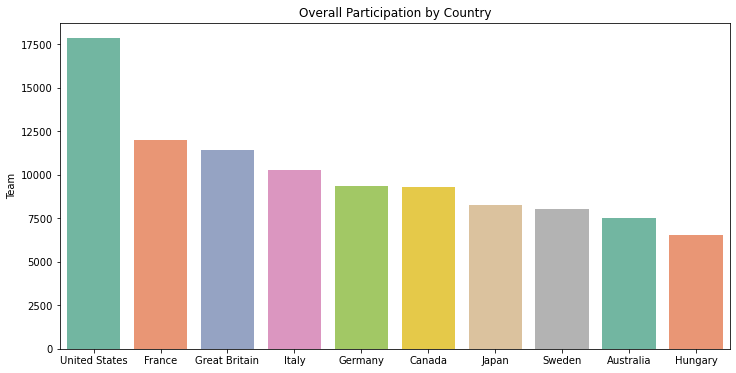

In [17]:
#plot for the top 10 countries

plt.figure(figsize=(12,6))

plt.title('Overall Participation by Country')
sns.barplot(x= top_10_countries.index, y=top_10_countries,palette = 'Set2');

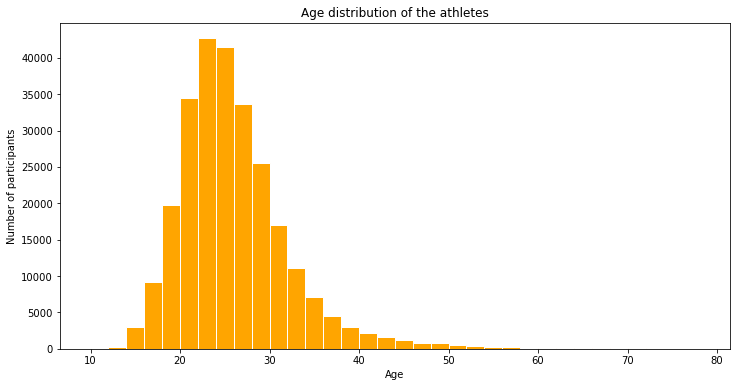

In [18]:
#Age distribution of the participats

plt.figure(figsize=(12,6))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age, bins= np.arange(10,80,2),color='orange', edgecolor='white');

In [19]:
# we can say that most of the athletes are between 20 - 30 years of age
# we have few athletes with 18 years of age and some athletes are above 50 years of age


In [20]:
#lets look at summer and winter sporting events that are part of the olympic games

winter_sports= athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [21]:
# winter sports involve snow or ice

In [22]:
#summer Olympics sports

In [23]:
summer_sports= athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [24]:
#Male and female participants

In [25]:
gender_counts= athletes_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

In [26]:
# we can see there are more male participants than female participants

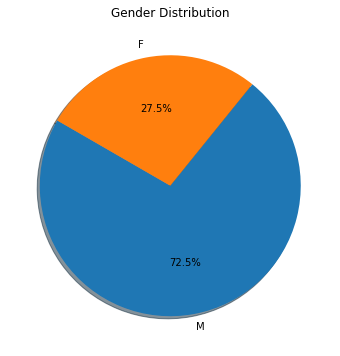

In [27]:
#Pie plot for male and female athletes

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 150, shadow=True);# autopct to display percentage in the chart using the formating provided, startangle is to change the direction of the pichart portion


In [28]:
#Total Medals

medal_count=athletes_df.Medal.value_counts()
medal_count

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

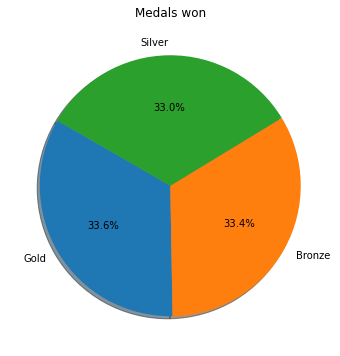

In [29]:
#Pie plot for Medals

plt.figure(figsize=(12,6))
plt.title('Medals won')
plt.pie(medal_count, labels = medal_count.index, autopct = '%1.1f%%', startangle = 150, shadow=True);# autopct to display percentage in the chart using the formating provided, startangle is to change the direction of the pichart portion


In [30]:
#Total number of female athletes in each olympics

female_participants = athletes_df[(athletes_df.Sex == 'F')& (athletes_df.Season == 'Summer')][['Sex', 'Year']]
female_participants= female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [31]:
# another way of filtering like above to find total female athletes
womenOlympics =athletes_df[(athletes_df.Sex=='F') & (athletes_df.Season == 'Summer')]


Text(0.5, 1.0, 'Women Participation')

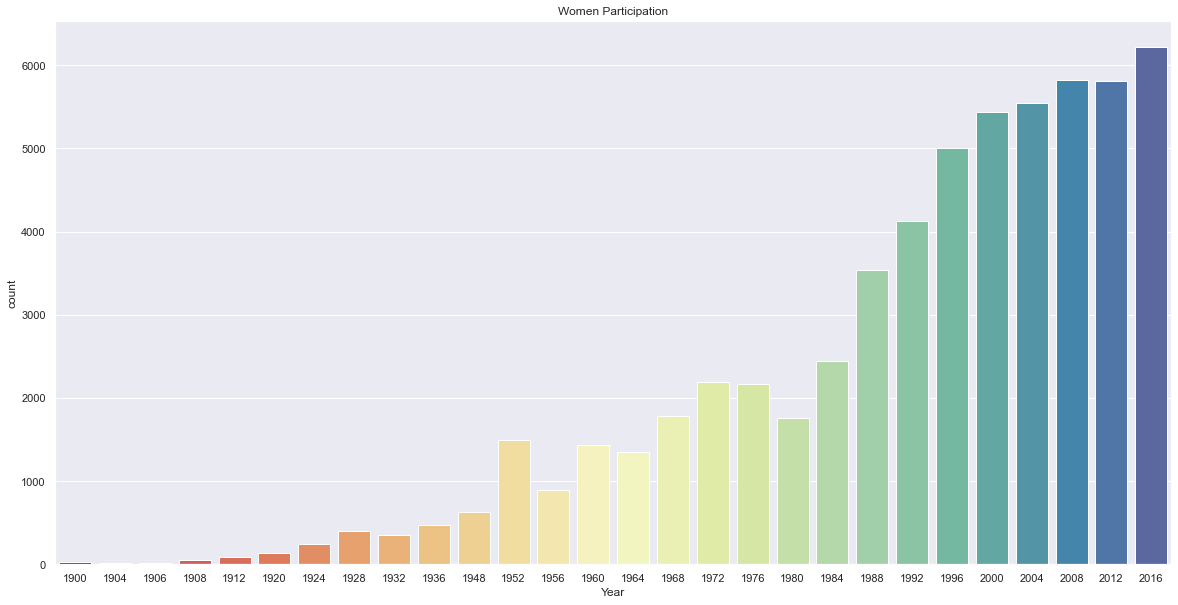

In [32]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data= womenOlympics, palette='Spectral')
plt.title('Women Participation')

In [33]:
# 2016 has the highest number of female participation

Text(0.5, 1.0, 'Plot of female Athletes over time')

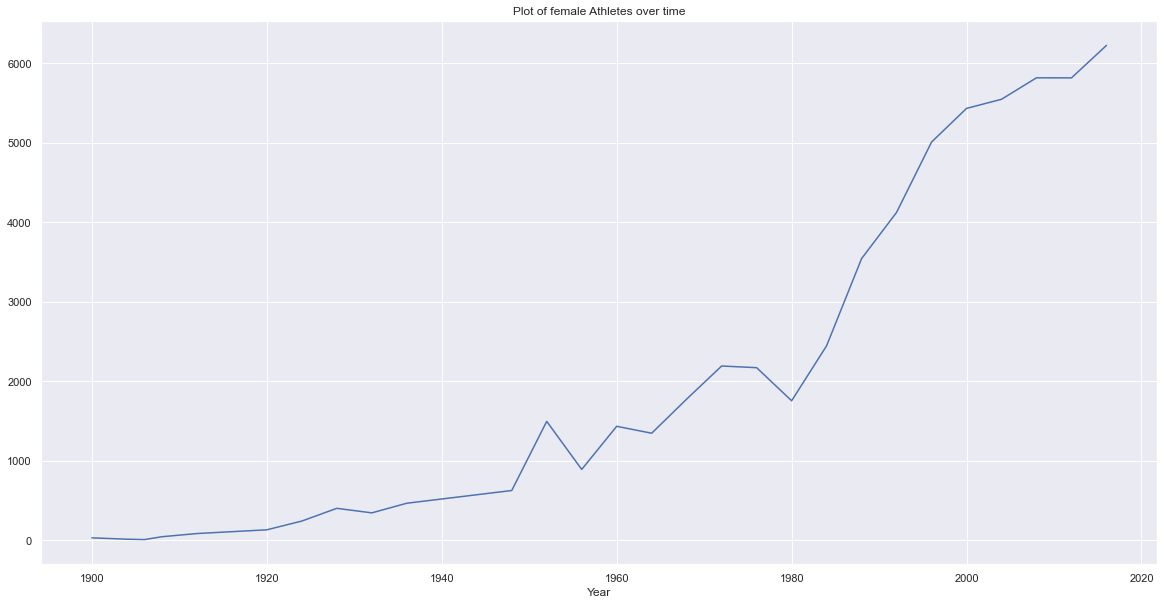

In [34]:
#plot line graph
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of female Athletes over time')

In [35]:
# we can see the women athelets participation has increased over time

In [36]:

#Gold medal Atheletes
goldmedals= athletes_df[(athletes_df.Medal=='Gold')]
goldmedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [37]:
# take only the values that are diffent from NaN
goldmedals= goldmedals[np.isfinite(goldmedals['Age'])]

In [38]:
#gold beyond 60 years

goldmedals['ID'][goldmedals['Age']>60].count()

6

In [39]:
#there are 6 gold medals won >60 years age

In [40]:
sporting_event = goldmedals['Sport'][goldmedals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\MyEar\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medals for atheletes over 60 years ')

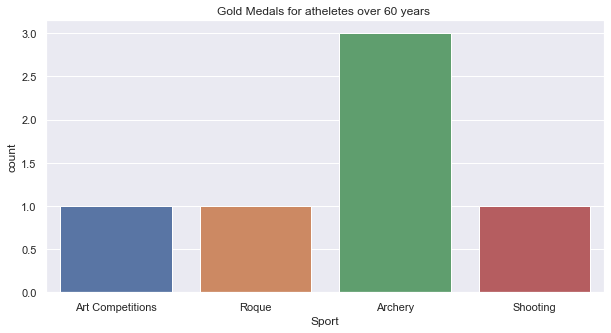

In [41]:
# plot for sporting event above

plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title('Gold Medals for atheletes over 60 years ')

In [ ]:
# 3 playes over 60 have won gold medal in archery, 1 gold medal in art competition, 1 gold medal in Roque and 1 gold medal in shooting


In [50]:
#gold medals in each country
goldmedal_country=goldmedals.Region.value_counts().reset_index(name='Medal').head(6)
goldmedal_country

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491


Text(0.5, 1.0, 'Gold Medal per Country')

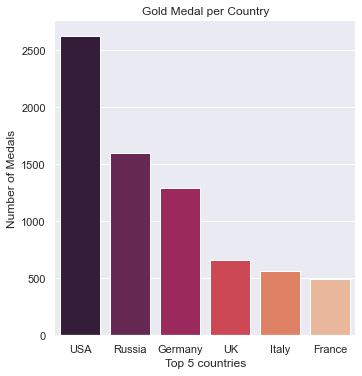

In [49]:
totalGoldMedals=goldmedals.Region.value_counts().reset_index(name='Medal').head(6)
g= sns.catplot(x='index',y='Medal', data= totalGoldMedals, height=5, kind='bar', palette= 'rocket')
g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_ylabels('Number of Medals')
plt.title('Gold Medal per Country')

In [52]:
#Analyse 2016 Rio Summer Olympics

max_year = athletes_df.Year.max()
print(max_year)

team_names= athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)


2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

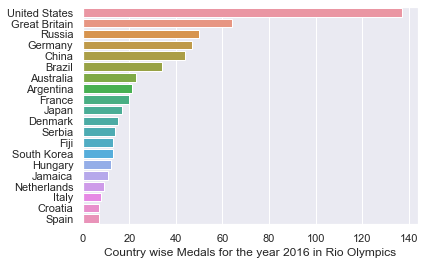

In [55]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)

plt.ylabel(None);
plt.xlabel('Country wise Medals for the year 2016 in Rio Olympics');

In [56]:
# scatter plot to visualise Height and weight of male and female athletes who won a medal at olympics

#First filter the data of athletes who won a medal we will not consider null values

not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]

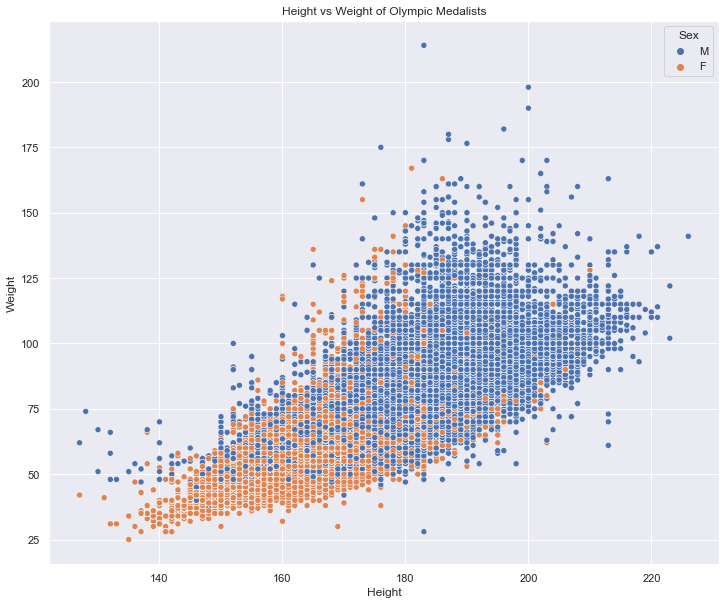

In [57]:
plt.figure(figsize = (12,10))
axis = sns.scatterplot(x = 'Height', y='Weight', data = not_null_medals, hue='Sex')
plt.title('Height vs Weight of Olympic Medalists');

In [58]:
# We can see that height and weight does influence the winning chances of the athletes